# Interaction signatures in the substrates
We have performed various calculations on different substrates:

* (Natural?) Substrates No. 01, 02, 05
* New Substrate No. 13
* A non-covalent inhibitor (8 Residues)
* Two convalent Binding inhibitors (8 Residues)

We would like to compare some QM observables in order to get _insights_ about Mpro affinities with those. 

## Construction of the trajectories
Clustered MD snapshots (weighted by occurrence) have been analyzed in order to understand variabilities of 
quantities.

* Neutral protonation states for the enzyme in the H41 (non-zwitterionic) , H164 (non-protonated, H174
* For substrate 1, Mpro monomer and dimer have been considered as well as two substrates on each monomer

## Observable analyzed
In this report, we analyse

* The interaction signatures of the "Tight-Binding" Hamiltonian projected on aminoacids (the QM _contact_ interaction)
* The charges on the substrates

In [1]:
from BigDFT import BioQM
import futile.Utils as U

In [2]:
alltars = U.file_list('.',suffix='tar.bz2')

In [3]:
def identify_snapshot(f):
    search = '_cluster_'
    istart = f.index(search) + len(search)
    ref = f[istart:].split('-')[0].split('.')[0]
    return int(ref)

In [9]:
grouptypes = ['apo','non','R-','S-','monomer_subs01','monomer_apo','subs01_one','subs01_two']

In [5]:
def system_archives(filelist, grouptypes):
    sys = {group:{} for group in grouptypes}
    sys['PCM']={}
    search = '_cluster_'
    for f in filelist:
        istart = f.index(search)
        ref = f[:istart].lower()
        for group in grouptypes:
            if group.lower() in ref and ref.index(group.lower())==0:
                break
        grp = 'PCM' if 'PCM' in f else group
        sys[grp][identify_snapshot(f)] = {'archive': f}
    return sys
def get_group_weights(groupstypes,weightfile):
    from pandas import read_excel
    from numpy import array,isnan
    weights = read_excel(weightfile,header=0,index_col=0)
    tt = weights.to_dict()
    data={}
    cl_num = int(max([t for t in tt['Cluster'] if not isnan(t)]))
    for gr in groupstypes:
        for key in tt:
            if gr.lower() in key.lower() and 'total structures' in key.lower():
                break
        wgt = array([float(tt[key][i+1]) for i in range(cl_num)])
        data[gr] = [w if not isnan(w) else 0.0 for w in wgt]  # /sum(wgt)*100
    return data

In [10]:
systems = system_archives(alltars,grouptypes)
weights = get_group_weights(grouptypes,'Weights.xlsx')

In [11]:
archives={group :[{'archive':tarfiles[a]['archive'],'weight': weights[group][i]} for i,a in enumerate(sorted(tarfiles.keys()))] for group,tarfiles in systems.items() if group != 'PCM'}

In [12]:
populations={}
for kind, archive in archives.items():
    print (kind)
    #if 'subs' not in kind: continue
    populations[kind] = BioQM.BioSystemPopulation(systems=archive,representative=0)
    populations[kind].serialize(kind+'new_serialization.tar.gz')
    

non
('0% done', 686)
('5% done', 652)
('10% done', 618)
('0% done', 590)
('0% done', 562)
('5% done', 534)
('10% done', 506)
('15% done', 478)
('0% done', 466)
('5% done', 443)
('10% done', 420)
('15% done', 397)
('20% done', 374)
('0% done', 368)
('5% done', 350)
('10% done', 332)
('0% done', 322)
('5% done', 306)
('10% done', 290)
0:  # weight=9.0
('0% done', 590)
('0% done', 590)
('0% done', 562)
('5% done', 534)
('10% done', 506)
('15% done', 478)
('0% done', 466)
('5% done', 443)
('10% done', 420)
('15% done', 397)
('20% done', 374)
('0% done', 368)
('5% done', 350)
('10% done', 332)
('0% done', 322)
('5% done', 306)
('10% done', 290)
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
1:  # weight=6.1
('0% done', 596)
('0% done', 587)
('0% done', 570)
('5% done', 542)
('10% done', 514)
('15% done', 486)
('0% done', 473)
('5% done', 450)
('10% done', 427)
('15% done', 404)
('20% done', 381)
('0% done', 375)
('5% done', 357)
('10% done', 339)
('0% done'

('15% done', 262)
('0% done', 259)
('5% done', 247)
('10% done', 235)
('15% done', 223)
('0% done', 215)
('5% done', 205)
('10% done', 195)
('0% done', 186)
('5% done', 177)
('10% done', 168)
The number of fragments has been modified 299 307
The number of fragments has been modified 308 312
The number of fragments has been modified 158 161
The number of fragments has been modified 185 186
The number of fragments has been modified 207 215
The number of fragments has been modified 255 259
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
3:  # weight=2.99500831946755
('0% done', 310)
('0% done', 309)
('0% done', 302)
('5% done', 287)
('10% done', 272)
('15% done', 257)
('0% done', 254)
('5% done', 242)
('10% done', 230)
('15% done', 218)
('0% done', 208)
('5% done', 198)
('10% done', 188)
('0% done', 184)
('5% done', 175)
('10% done', 166)
The number of fragments has been modified 307 302
The number of fragments has been modified 312 309
The number of fragm

('0% done', 278)
('5% done', 265)
('10% done', 252)
('15% done', 239)
('20% done', 226)
('0% done', 224)
('5% done', 213)
('10% done', 202)
('15% done', 191)
('0% done', 181)
('5% done', 172)
('10% done', 163)
('0% done', 158)
('5% done', 151)
('10% done', 144)
('15% done', 137)
The number of fragments has been modified 283 278
The number of fragments has been modified 293 286
The number of fragments has been modified 145 137
The number of fragments has been modified 165 158
The number of fragments has been modified 187 181
The number of fragments has been modified 233 224
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
5:  # weight=13.0
('0% done', 297)
('0% done', 296)
('0% done', 287)
('5% done', 273)
('10% done', 259)
('15% done', 245)
('0% done', 235)
('5% done', 224)
('10% done', 213)
('15% done', 202)
('0% done', 192)
('5% done', 183)
('10% done', 174)
('0% done', 166)
('5% done', 158)
('10% done', 150)
The number of fragments has been modified 2

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 2416, ' ') redefined at line 9635.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 2416, ' ','SOL') already defined with the same name at line  9635.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=2416 icode= > at line 9635.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=2416 icode= > at line 9636.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 634)
('0% done', 629)
('0% done', 612)
('5% done', 582)
('10% done', 552)
('15% done', 522)
('0% done', 504)
('5% done', 479)
('10% done', 454)
('15% done', 429)
('0% done', 420)
('5% done', 399)
('10% done', 378)
('0% done', 373)
('5% done', 355)
('10% done', 337)
The number of fragments has been modified 604 612
The number of fragments has been modified 625 629
The number of fragments has been modified 338 333
The number of fragments has been modified 374 373
The number of fragments has been modified 418 420
The number of fragments has been modified 495 504
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
2:  # weight=6.9


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 8447, ' ') redefined at line 9575.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 8447, ' ','SOL') already defined with the same name at line  9575.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=8447 icode= > at line 9575.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=8447 icode= > at line 9576.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 612)
('0% done', 608)
('0% done', 595)
('5% done', 566)
('10% done', 537)
('15% done', 508)
('0% done', 491)
('5% done', 467)
('10% done', 443)
('15% done', 419)
('0% done', 402)
('5% done', 382)
('10% done', 362)
('0% done', 358)
('5% done', 341)
('10% done', 324)
The number of fragments has been modified 612 595
The number of fragments has been modified 629 608
The number of fragments has been modified 333 320
The number of fragments has been modified 373 358
The number of fragments has been modified 420 402
The number of fragments has been modified 504 491
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
3:  # weight=6.7


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 7336, ' ') redefined at line 9581.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 7336, ' ','SOL') already defined with the same name at line  9581.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=7336 icode= > at line 9581.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=7336 icode= > at line 9582.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 614)
('0% done', 613)
('0% done', 601)
('5% done', 571)
('10% done', 541)
('15% done', 511)
('0% done', 503)
('5% done', 478)
('10% done', 453)
('15% done', 428)
('0% done', 408)
('5% done', 388)
('10% done', 368)
('0% done', 368)
('5% done', 350)
The number of fragments has been modified 595 601
The number of fragments has been modified 608 613
The number of fragments has been modified 320 333
The number of fragments has been modified 358 368
The number of fragments has been modified 402 408
The number of fragments has been modified 491 503
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
4:  # weight=5.7
('0% done', 607)
('0% done', 606)
('0% done', 594)
('5% done', 565)
('10% done', 536)
('15% done', 507)
('0% done', 495)
('5% done', 471)
('10% done', 447)
('15% done', 423)
('0% done', 407)
('5% done', 387)
('10% done', 367)
('0% done', 358)
('5% done', 341)
('10% done', 324)
The number of fragments has been modified 601 594
The number of 

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 932, ' ') redefined at line 9521.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 932, ' ','SOL') already defined with the same name at line  9521.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=932 icode= > at line 9521.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=932 icode= > at line 9522.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarn

('0% done', 611)
('0% done', 610)
('0% done', 600)
('5% done', 570)
('10% done', 540)
('15% done', 510)
('0% done', 498)
('5% done', 474)
('10% done', 450)
('15% done', 426)
('0% done', 417)
('5% done', 397)
('10% done', 377)
('0% done', 364)
('5% done', 346)
The number of fragments has been modified 592 600
The number of fragments has been modified 602 610
The number of fragments has been modified 315 332
The number of fragments has been modified 354 364
The number of fragments has been modified 399 417
The number of fragments has been modified 488 498
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
7:  # weight=3.6


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 4413, ' ') redefined at line 9566.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 4413, ' ','SOL') already defined with the same name at line  9566.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=4413 icode= > at line 9566.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=4413 icode= > at line 9567.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 619)
('0% done', 617)
('0% done', 610)
('5% done', 580)
('10% done', 550)
('15% done', 520)
('0% done', 508)
('5% done', 483)
('10% done', 458)
('15% done', 433)
('0% done', 416)
('5% done', 396)
('10% done', 376)
('0% done', 361)
('5% done', 343)
The number of fragments has been modified 600 610
The number of fragments has been modified 610 617
The number of fragments has been modified 332 334
The number of fragments has been modified 364 361
The number of fragments has been modified 417 416
The number of fragments has been modified 498 508
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
S-
('0% done', 721)
('5% done', 685)
('10% done', 649)
('0% done', 621)
('0% done', 592)
('5% done', 563)
('10% done', 534)
('15% done', 505)
('0% done', 490)
('5% done', 466)
('10% done', 442)
('15% done', 418)
('20% done', 394)
('0% done', 394)
('5% done', 375)
('10% done', 356)
('0% done', 348)
('5% done', 331)
0:  # weight=7.8
('0% done', 621)
('0% done

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 3123, ' ') redefined at line 9769.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 3123, ' ','SOL') already defined with the same name at line  9769.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=3123 icode= > at line 9769.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=3123 icode= > at line 9770.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 704)
('5% done', 669)
('10% done', 634)
('0% done', 605)
('0% done', 583)
('5% done', 554)
('10% done', 525)
('15% done', 496)
('0% done', 476)
('5% done', 453)
('10% done', 430)
('15% done', 407)
('0% done', 389)
('5% done', 370)
('10% done', 351)
('0% done', 341)
('5% done', 324)
('10% done', 307)
0:  # weight=7.4
('0% done', 605)
('0% done', 605)
('0% done', 583)
('5% done', 554)
('10% done', 525)
('15% done', 496)
('0% done', 476)
('5% done', 453)
('10% done', 430)
('15% done', 407)
('0% done', 389)
('5% done', 370)
('10% done', 351)
('0% done', 341)
('5% done', 324)
('10% done', 307)
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
1:  # weight=4.3
('0% done', 596)
('0% done', 590)
('0% done', 571)
('5% done', 543)
('10% done', 515)
('15% done', 487)
('0% done', 465)
('5% done', 442)
('10% done', 419)
('15% done', 396)
('0% done', 384)
('5% done', 365)
('10% done', 346)
('0% done', 344)
('5% done', 327)
('10% done', 310)
The number of fr

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 1722, ' ') redefined at line 9739.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 1722, ' ','SOL') already defined with the same name at line  9739.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=1722 icode= > at line 9739.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=1722 icode= > at line 9740.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 597)
('0% done', 594)
('0% done', 579)
('5% done', 551)
('10% done', 523)
('15% done', 495)
('0% done', 476)
('5% done', 453)
('10% done', 430)
('15% done', 407)
('20% done', 384)
('0% done', 383)
('5% done', 364)
('10% done', 345)
('0% done', 333)
('5% done', 317)
('10% done', 301)
The number of fragments has been modified 571 579
The number of fragments has been modified 590 594
The number of fragments has been modified 302 295
The number of fragments has been modified 344 333
The number of fragments has been modified 384 383
The number of fragments has been modified 465 476
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
3:  # weight=3.6
('0% done', 597)
('0% done', 595)
('0% done', 581)
('5% done', 552)
('10% done', 523)
('15% done', 494)
('0% done', 472)
('5% done', 449)
('10% done', 426)
('15% done', 403)
('0% done', 388)
('5% done', 369)
('10% done', 350)
('0% done', 346)
('5% done', 329)
('10% done', 312)
The number of fragments has 

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 8114, ' ') redefined at line 9679.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 8114, ' ','SOL') already defined with the same name at line  9679.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=8114 icode= > at line 9679.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=8114 icode= > at line 9680.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 590)
('0% done', 588)
('0% done', 575)
('5% done', 547)
('10% done', 519)
('15% done', 491)
('0% done', 465)
('5% done', 442)
('10% done', 419)
('15% done', 396)
('0% done', 383)
('5% done', 364)
('10% done', 345)
('0% done', 332)
('5% done', 316)
('10% done', 300)
The number of fragments has been modified 577 575
The number of fragments has been modified 591 588
The number of fragments has been modified 302 299
The number of fragments has been modified 338 332
The number of fragments has been modified 384 383
The number of fragments has been modified 472 465
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
8:  # weight=2.2
('0% done', 586)
('0% done', 586)
('0% done', 573)
('5% done', 545)
('10% done', 517)
('15% done', 489)
('0% done', 465)
('5% done', 442)
('10% done', 419)
('15% done', 396)
('0% done', 381)
('5% done', 362)
('10% done', 343)
('0% done', 332)
('5% done', 316)
('10% done', 300)
The number of fragments has been modified 575 

  - dipole
  - charge
  - purity
9:  # weight=2.32558139534884
('0% done', 568)
('0% done', 568)
('0% done', 559)
('5% done', 532)
('10% done', 505)
('15% done', 478)
('0% done', 462)
('5% done', 439)
('10% done', 416)
('15% done', 393)
('0% done', 373)
('5% done', 355)
('10% done', 337)
('15% done', 319)
('0% done', 315)
('5% done', 300)
('10% done', 285)
The number of fragments has been modified 558 559
The number of fragments has been modified 567 568
The number of fragments has been modified 259 273
The number of fragments has been modified 312 315
The number of fragments has been modified 372 373
The number of fragments has been modified 457 462
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
10:  # weight=2.32558139534884
('0% done', 582)
('0% done', 581)
('0% done', 572)
('5% done', 544)
('10% done', 516)
('15% done', 488)
('0% done', 474)
('5% done', 451)
('10% done', 428)
('15% done', 405)
('20% done', 382)
('0% done', 376)
('5% done', 358)
('1

  - dipole
  - charge
  - purity
4:  # weight=2.99003322259136
('0% done', 598)
('0% done', 597)
('0% done', 589)
('5% done', 560)
('10% done', 531)
('15% done', 502)
('0% done', 482)
('5% done', 458)
('10% done', 434)
('15% done', 410)
('0% done', 397)
('5% done', 378)
('10% done', 359)
('0% done', 351)
('5% done', 334)
('10% done', 317)
('15% done', 300)
The number of fragments has been modified 585 589
The number of fragments has been modified 594 597
The number of fragments has been modified 298 297
The number of fragments has been modified 347 351
The number of fragments has been modified 393 397
The number of fragments has been modified 475 482
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
5:  # weight=2.99003322259136


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 8453, ' ') redefined at line 9723.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 8453, ' ','SOL') already defined with the same name at line  9723.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=8453 icode= > at line 9723.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=8453 icode= > at line 9724.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 596)
('0% done', 595)
('0% done', 587)
('5% done', 558)
('10% done', 529)
('15% done', 500)
('0% done', 484)
('5% done', 460)
('10% done', 436)
('15% done', 412)
('0% done', 392)
('5% done', 373)
('10% done', 354)
('15% done', 335)
('0% done', 335)
('5% done', 319)
('10% done', 303)
The number of fragments has been modified 589 587
The number of fragments has been modified 597 595
The number of fragments has been modified 297 291
The number of fragments has been modified 351 335
The number of fragments has been modified 397 392
The number of fragments has been modified 482 484
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
6:  # weight=2.6578073089701
('0% done', 601)
('0% done', 601)
('0% done', 594)
('5% done', 565)
('10% done', 536)
('15% done', 507)
('0% done', 492)
('5% done', 468)
('10% done', 444)
('15% done', 420)
('0% done', 408)
('5% done', 388)
('10% done', 368)
('0% done', 350)
('5% done', 333)
('10% done', 316)
The number of fr

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 9230, ' ') redefined at line 9714.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 9230, ' ','SOL') already defined with the same name at line  9714.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=9230 icode= > at line 9714.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=9230 icode= > at line 9715.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 591)
('0% done', 589)
('0% done', 582)
('5% done', 553)
('10% done', 524)
('15% done', 495)
('0% done', 474)
('5% done', 451)
('10% done', 428)
('15% done', 405)
('0% done', 388)
('5% done', 369)
('10% done', 350)
('0% done', 336)
('5% done', 320)
('10% done', 304)
('15% done', 288)
The number of fragments has been modified 564 582
The number of fragments has been modified 571 589
The number of fragments has been modified 271 287
The number of fragments has been modified 319 336
The number of fragments has been modified 378 388
The number of fragments has been modified 463 474
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
11:  # weight=1.99335548172757
('0% done', 590)
('0% done', 590)
('0% done', 581)
('5% done', 552)
('10% done', 523)
('15% done', 494)
('0% done', 483)
('5% done', 459)
('10% done', 435)
('15% done', 411)
('0% done', 392)
('5% done', 373)
('10% done', 354)
('0% done', 340)
('5% done', 323)
('10% done', 306)
The number of 

/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 2004, ' ') redefined at line 9633.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 2004, ' ','SOL') already defined with the same name at line  9633.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=2004 icode= > at line 9633.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=2004 icode= > at line 9634.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 591)
('0% done', 591)
('0% done', 584)
('5% done', 555)
('10% done', 526)
('15% done', 497)
('0% done', 478)
('5% done', 455)
('10% done', 432)
('15% done', 409)
('0% done', 390)
('5% done', 371)
('10% done', 352)
('0% done', 348)
('5% done', 331)
('10% done', 314)
('15% done', 297)
The number of fragments has been modified 579 584
The number of fragments has been modified 587 591
The number of fragments has been modified 287 296
The number of fragments has been modified 330 348
The number of fragments has been modified 392 390
The number of fragments has been modified 472 478
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
17:  # weight=1.66112956810631


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 2795, ' ') redefined at line 9657.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 2795, ' ','SOL') already defined with the same name at line  9657.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=2795 icode= > at line 9657.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=2795 icode= > at line 9658.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

('0% done', 594)
('0% done', 592)
('0% done', 585)
('5% done', 556)
('10% done', 527)
('15% done', 498)
('0% done', 479)
('5% done', 456)
('10% done', 433)
('15% done', 410)
('0% done', 394)
('5% done', 375)
('10% done', 356)
('15% done', 337)
('0% done', 334)
('5% done', 318)
('10% done', 302)
The number of fragments has been modified 584 585
The number of fragments has been modified 591 592
The number of fragments has been modified 296 293
The number of fragments has been modified 348 334
The number of fragments has been modified 390 394
The number of fragments has been modified 478 479
  - interactions
  - bond_orders
  - system_dfs
  - dipole
  - charge
  - purity
18:  # weight=1.32890365448505
('0% done', 579)
('0% done', 579)
('0% done', 572)
('5% done', 544)
('10% done', 516)
('15% done', 488)
('0% done', 469)
('5% done', 446)
('10% done', 423)
('15% done', 400)
('0% done', 382)
('5% done', 363)
('10% done', 344)
('15% done', 325)
('0% done', 324)
('5% done', 308)
('10% done', 2

In [14]:
pop_archives = U.file_list('.', suffix='newnew_serialization.tar.gz')
for arch in pop_archives:
    key = arch.split('_')[0].replace('subs','')
    print ('Loading...',key)
    populations[key]=BioQM.BioSystemPopulation.load(arch)

('Loading...', '01')
0:  # weight=1.0
  - bond_orders
  - system_dfs
  - interactions
('Loading...', '02')


/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 6324, ' ') redefined at line 9681.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/StructureBuilder.py:153: PDBConstructionWarning: WARNING: Residue (' ', 6324, ' ','SOL') already defined with the same name at line  9681.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom OW defined twice in residue <Residue SOL het=  resseq=6324 icode= > at line 9681.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/usr/local/lib/python2.7/dist-packages/Bio/PDB/PDBParser.py:345: PDBConstructionWarning: PDBConstructionException: Atom HW1 defined twice in residue <Residue SOL het=  resseq=6324 icode= > at line 9682.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstruction

0:  # weight=1.0
  - bond_orders
  - system_dfs
  - interactions
('Loading...', '13')
0:  # weight=1.0
  - bond_orders
  - system_dfs
  - interactions
('Loading...', '05')
0:  # weight=1.0
  - bond_orders
  - system_dfs
  - interactions


# Construct the functions to evaluate with the population
For each population, we will evaluate
 * The charges on the residues
 * The interaction of the residues with the inhibitor (when applicable)
 * The interaction of the residues with the solvent
 * The interaction of the two monomers with each other
 * The interaction of the inhibitor with the dimer

We split the system in sections.

In [54]:
def get_chain(fraglist):
    return set(frag.split('-')[0] for frag in fraglist)
def select_chain(ch,fraglist):
    return [frag for frag in fraglist if ch+'-' in frag and 'SOL' not in frag]
class Sections():
    inhibitor_length = 12
    def __init__(self,system):
        self.system = system   
    def _enrich_chain(self,seq):
        ch = get_chain(seq)
        assert (len(ch)) == 1
        return list(set(seq + select_chain(list(ch)[0],self.system.unmatched_fragments)))
    def interaction(self,attribute):
        return map(abs,self.system.fragment_interaction_strengths(target_fragments=getattr(self,attribute)))
    @property
    def inhibitor1(self):
        for seq in self.system.sequences_to_fragments:
            if len(seq) < self.inhibitor_length:
                return self._enrich_chain(seq)
        return []
    @property
    def inhibitor2(self):
        icount=0
        for seq in self.system.sequences_to_fragments:
            if len(seq) < self.inhibitor_length:
                icount +=1
                if icount == 2:
                    return self._enrich_chain(seq)
        return []
    @property
    def monomer1(self):
        for seq in self.system.sequences_to_fragments:
            if len(seq) > self.inhibitor_length:
                return self._enrich_chain(seq)
        return []
    @property
    def monomer2(self):
        icount = 0 
        for seq in self.system.sequences_to_fragments:
            if len(seq) > self.inhibitor_length:
                icount +=1
                if icount == 2: 
                    return self._enrich_chain(seq)
        return []
    @property
    def inhibitors(self):
        return self.inhibitor1+self.inhibitor2
    @property
    def dimer(self):
        return self.monomer1+self.monomer2
    @property
    def assembly(self):
        return self.inhibitors+self.dimer
    @property
    def solvent(self):
        return [frag for frag in self.system.unmatched_fragments if 'SOL' in frag]
def calculate_interaction_of(attribute,sys):
    sec=Sections(sys)
    return sec.interaction(attribute)
def interaction_function(attribute):
    from functools import partial
    return partial(calculate_interaction_of,attribute)
to_extract = { interaction: interaction_function(interaction) for interaction in ['inhibitors','solvent','monomer1','monomer2','dimer']}

# Substrate 1: difference between monomer and dimer
We sum all the weighted data to evaluate the interaction of:

* The inhibitor with the monomer in the single monomer trajectory
* The inhibitor with the monomer in the dimer trajectory
* Each of the inhibitor with the monomers of the dimer trajectory

The interaction strengths seem compatible and have similar standard deviations

In [98]:
def cropped_dataframe(df, substrate, enzyme):
    df1 = df[enzyme].transpose()
    return df1[substrate].transpose()
def interaction_subs_enzyme(pop,substrate,enzyme,aggregated=False):
    from ase.units import kcal,mol,Hartree
    from pandas import DataFrame
    factor = Hartree/(kcal/mol)
    if aggregated:
        return DataFrame([factor*cropped_dataframe(pop.mean, substrate, enzyme).values.sum()])
    else:
        return [DataFrame([factor*cropped_dataframe(df, substrate, enzyme).values.sum()]) for df in pop.datas]
    
def population_data(pop, substrate, enzyme, aggregated):
    from BigDFT.Stats import weighted_dataframe
    dfs = interaction_subs_enzyme(pop,substrate,enzyme,aggregated)
    if aggregated:
        return dfs
    else:
        return weighted_dataframe(dfs,pop.weights)
def cumulative_interactions(populations,select=None,aggregated=False):
    def append_df(name):
        if abs(df.values.sum()) > 1:
            df['name'] = k+'-'+name
            dfs.append(df)
    from pandas import concat
    dfs = []
    for k,sys in populations.items():
        # print (k)
        if select is not None and k not in select: continue
        sec = Sections(sys)
        pop = sys.populations['interactions']
        # print (sec.inhibitor1)
        df = population_data(pop,sec.inhibitor1,sec.monomer1,aggregated)
        append_df('inh1')
        df = population_data(pop,sec.inhibitor2,sec.monomer2,aggregated)
        append_df('inh2')
    return concat(dfs)
from seaborn import violinplot

In [99]:
subsone = ['01','subs01_two','monomer_subs01']
df=cumulative_interactions(populations,select=subsone)
#dfavg=cumulative_interactions(populations,aggregated=True)

In [100]:
# overall table of all the data
df.groupby('name',sort=True).describe()

0                                                 \
                     count        mean        std         min         25%   
name                                                                        
01-inh1              101.0 -175.084200  24.224052 -220.375205 -195.641393   
monomer_subs01-inh1   97.0 -182.806940  23.315775 -247.689650 -196.817659   
subs01_two-inh1      101.0 -166.258493  24.618006 -242.515445 -184.614887   
subs01_two-inh2      101.0 -174.011998  22.877678 -245.274680 -179.604055   

                                                         
                            50%         75%         max  
name                                                     
01-inh1             -173.142667 -163.783655 -122.405908  
monomer_subs01-inh1 -182.438920 -170.390072 -149.369198  
subs01_two-inh1     -168.419055 -144.006424 -131.077342  
subs01_two-inh2     -176.764357 -166.173507 -118.323943

'boxplot'

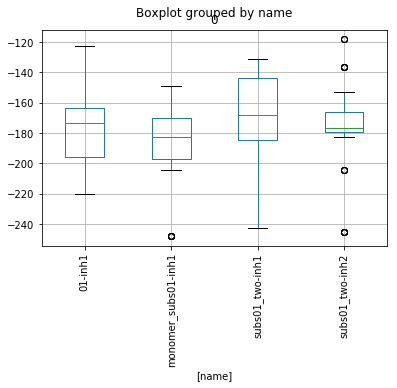

In [101]:
df.boxplot(by='name',rot=90)
'boxplot'

'violinplot'

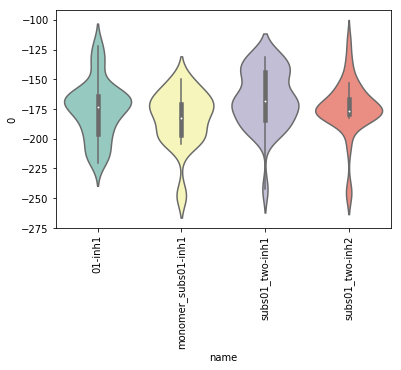

In [102]:
ax = violinplot(x='name',y=0,data=df,crop=0,palette="Set3", split=True,
           scale="count",rotate=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
'violinplot'

## Difference in strengths between natural substrates and covalent interactions
We compare the strength of the interaction with the non covalent and covalent substrates.
We see that the natural substrates have all interaction strenghts that are in between the other tow categories

In [103]:
compare = ['non','subs01_two','R-','S-']
df=cumulative_interactions(populations,select=compare)
df.groupby('name',sort=True).describe()

0                                                 \
                 count        mean        std         min         25%   
name                                                                    
R--inh1          101.0 -308.733477  25.605495 -359.348963 -329.306145   
R--inh2          101.0 -304.047192  11.657924 -337.193915 -310.394279   
S--inh1           99.0 -262.600778  22.964452 -303.292188 -278.193350   
S--inh2           99.0 -298.639308  19.205889 -349.216633 -308.788738   
non-inh1          99.0 -132.315550  22.688043 -171.530930 -146.424730   
non-inh2          99.0 -120.256959  21.985158 -175.660316 -124.566245   
subs01_two-inh1  101.0 -166.258493  24.618006 -242.515445 -184.614887   
subs01_two-inh2  101.0 -174.011998  22.877678 -245.274680 -179.604055   

                                                     
                        50%         75%         max  
name                                                 
R--inh1         -291.307759 -289.412953 -275.702045  
R--inh2         -305.109476 -299.805420 -279.365741  
S--inh1         -255.921105 -243.459163 -229.776343  
S--inh2         -293.471683 -282.886400 -277.366602  
non-inh1        -138.235174 -120.911005  -79.877597  
non-inh2        -119.927540 -109.330632  -83.970206  
subs01_two-inh1 -168.419055 -144.006424 -131.077342  
subs01_two-inh2 -176.764357 -166.173507 -118.323943

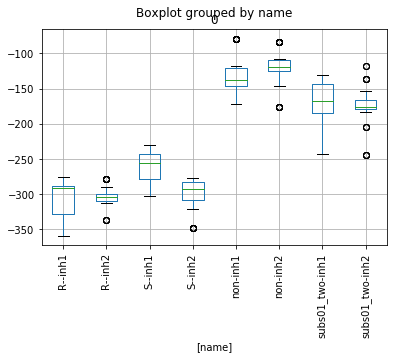

In [104]:
df.boxplot(by='name',rot=90)

# Comparison of the different natural substrates
We now compare the different natural substrates. We show:
* The total interactions, with binding order 01 < 02 < 13 < 05;
* The interaction signatures;
* The charges of the different substrates;

In [105]:
compare = ['01','02','13','05']
df=cumulative_interactions(populations,select=compare)
df.groupby('name',sort=True).describe()

0                                                             \
         count        mean        std         min         25%         50%   
name                                                                        
01-inh1  101.0 -175.084200  24.224052 -220.375205 -195.641393 -173.142667   
02-inh1  100.0 -187.680581  20.522605 -215.258216 -199.649468 -196.855022   
05-inh1  100.0 -204.176291  31.997166 -302.348984 -234.103422 -183.525301   
13-inh1  101.0 -191.298818  31.370707 -293.724466 -209.893210 -182.026207   

                                 
                75%         max  
name                             
01-inh1 -163.783655 -122.405908  
02-inh1 -173.982751 -102.707579  
05-inh1 -183.525301 -155.346921  
13-inh1 -175.656131 -146.993404

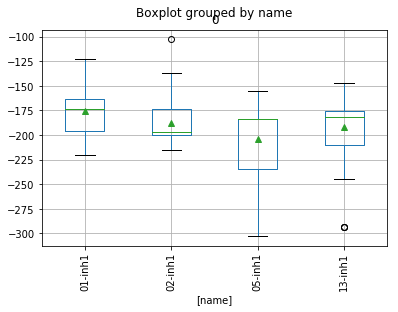

In [108]:
df.boxplot(by='name',rot=90, showmeans=True)

[Text(0,0,'01-inh1'),
 Text(0,0,'02-inh1'),
 Text(0,0,'05-inh1'),
 Text(0,0,'13-inh1')]

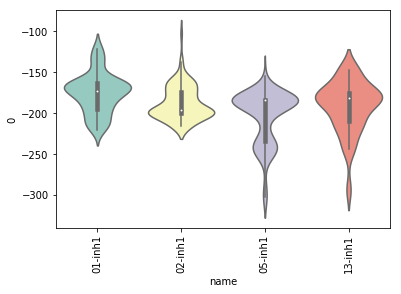

In [109]:
ax = violinplot(x='name',y=0,
           data=df,crop=0,
           palette="Set3", split=True,
           scale="count",rotate=90,order=['01-inh1','02-inh1','05-inh1','13-inh1'],showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

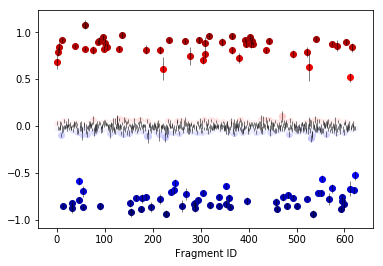

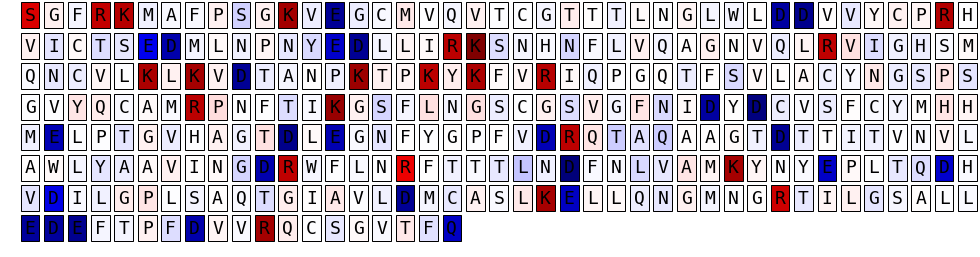

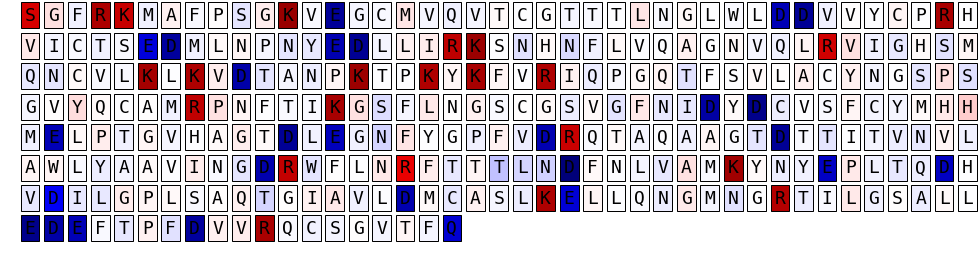

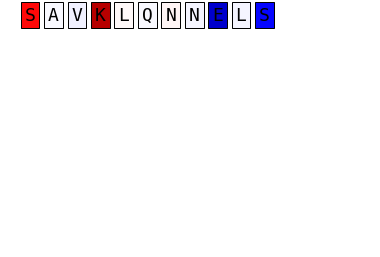

In [48]:
populations['05'].represent(color_by='charge')

In [ ]:
def aggregate_interactions(df
    from pandas import DataFrame
    enzyme=pop.sequences_to_fragments[0]+pop.sequences_to_fragments[1]
    substrate=pop.sequences_to_fragments[2]
    sums_data = {'sums': [],'weights': []}
    popp = pop.populations['interactions']
    for df, w in zip(popp.datas,popp.weights):
        cropped_df = substrate_info(df,substrate,enzyme)
        sums_data['sums'].append(DataFrame([factor*cropped_df.values.sum()]))
        sums_data['weights'].append(w)
    dft = weighted_dataframe(sums_data['sums'],sums_data['weights'])
    dft['name'] = name
    return dft


In [24]:
sec.inhibitors

['B-THR:1',
 'B-SER:2',
 'B-ALA:3',
 'B-VAL:4',
 'B-LEU:5',
 'B-GLN:6',
 'B-SER:7',
 'B-GLY:8',
 'B-PHE:9',
 'B-ARG:10',
 'B-LYS:11']

# Electrostatic Energy between fragments
We would like to calculate the terms that correspond to the total energy that can be ascribed to the two electrostatic contributions between two different fragments:
$$
E_{ion} - E_H = \frac{1}{2}\int d \mathbf{r} d\mathbf{r'} \frac{-\rho_{el}^F(\mathbf r) \rho_{el}^G(\mathbf r') + \rho_{ion}^F(\mathbf r) \rho_{ion}^G(\mathbf r')}{|r-r'|} =
\frac{1}{2}\int d \mathbf{r} d\mathbf{r'} \frac{\rho_{tot}(\mathbf r) \rho_{tot}(\mathbf r')- 2 \rho_{el}(\mathbf r) \rho_{ion}(\mathbf r')}{|r-r'|} 
$$
To calculate these terms, we can employ the decomposition of the charge density per fragments (namely $\rho(\mathbf r) = \sum_{\mathcal F} \rho_{\mathcal F}(\mathbf r)$). In turn, the fragment density $\rho_{\mathcal F}$ can be decomposed as a superposition of the atomic densities, i.e
$$\rho_{\mathcal F}(\mathbf r) = \sum_{a \in \mathcal F} \rho_a(\mathbf r - \mathbf R_a)\;.$$ 
It has to be noticed that the atomic densities are approximated as centered around the atom positions, which in general may not be true, especially for small fragments having covalent bonds.
From a large distance with respect to the atomic positions, we can approximate the atomic densities as a sum of point multipoles:
$$
\rho_a(\mathbf r - \mathbf R_a) \simeq Q_0^{(a)} \delta(\mathbf r- \mathbf R_a) + \mathbf p_a \cdot \nabla \delta(\mathbf r - \mathbf R_a) + {Q_2^{(a)}}_{ij} \partial_i \partial_j \delta(\mathbf r- \mathbf R_a) \cdots
$$
Such an expression enables us to express the multipole expansion of the generated fragment electrostatic potential:
$$
V_\mathcal F (\mathbf r) = \sum_{a \in \mathcal F} \left[\frac{Q_0^{(a)}}{|\mathbf r - \mathbf R_a|} + \frac{\mathbf p_a \cdot (\mathbf r - \mathbf R_a) }{|\mathbf r - \mathbf R_a|^3} + \frac{{Q_2^{(a)}}_{ij}(\mathbf r - \mathbf R_a)_i (\mathbf r - \mathbf R_a)_j }{2 |\mathbf r - \mathbf R_a|^5}\right]
$$

We can then employ a multipole expansion for the electrostatic contribution between fragments:
$$
2 E_{\mathcal {FG}}= \int d \mathbf r V_\mathcal F (\mathbf r)\rho_{\mathcal G}(\mathbf r) = \sum_{a \in \mathcal F} \sum_{b \in \mathcal G}\int d \mathbf r d\mathbf r' \frac{\rho_a(\mathbf r - \mathbf R_a) \rho_b(\mathbf r' - \mathbf R_b)}{|\mathbf r -\mathbf r'|} \simeq \sum_{a \in \mathcal F} \sum_{b \in \mathcal G} \left[ \frac{Q_0^{(a)} Q_0^{(b)}}{R_{ab}} + \frac{ \left(Q_0^{(a)} \mathbf p_b -Q_0^{(b)} \mathbf p_a \right) \cdot \mathbf R_{ab} + \mathbf p_a \cdot \mathbf p_b }{R_{ab}^3} - 3\frac{ \left(\mathbf p_a  \cdot \mathbf R_{ab}\right) \left(\mathbf p_b  \cdot \mathbf R_{ab}\right)}{R_{ab}^5} +\cdots 
\right]
$$
Some simplifications can be employed in order to calculate this product
$$
\left(Q_0^{(a)} \mathbf p_b -Q_0^{(b)} \mathbf p_a \right) \cdot \mathbf R_{ab} = 
Q_0^{(a)} \mathbf p_b \cdot \mathbf R_{a} + Q_0^{(b)} \mathbf p_a  \cdot \mathbf R_{b} - \left(Q_0^{(a)} \mathbf p_b \cdot \mathbf R_{b} + Q_0^{(b)} \mathbf p_a  \cdot \mathbf R_{a}\right) = Q_0^{(a)} M_{ab} + Q_0^{(b)} M_{ba} - \left(Q_0^{(a)} D_b + Q_0^{(b)} D_a \right)\;,
$$
where $M_{ab} \equiv  \mathbf p_b \cdot \mathbf R_{a}$ and $D_a \equiv M_{aa}$.

Also
$$
\left(\mathbf p_a  \cdot \mathbf R_{ab}\right) \left(\mathbf p_b  \cdot \mathbf R_{ab}\right) =  \left(D_a - M_{ba}\right) \left(M_{ab}- D_b\right) = -D_a D_b + D_a M_{ab} + M_{ba} D_b - M_{ba} M_{ab} 
$$


Such expression can then be employed to evaluate the complete interaction energy, considering both the electronic and the ionic contribution.
We assume that the multipole expansion will be only associated to the fragment electronic density $\rho_{el}^\mathcal F$, whereas the ionic contribution associated to the atoms belonging to the fragment is monopolar only, with (screened) charges equal to $Z^{(a)}$. According to the formula above, we would have:
$$
\int d \mathbf{r} d\mathbf{r'}\frac{ \rho_{el}^\mathcal F(\mathbf r) \rho_{el}^\mathcal G(\mathbf r') + \rho_{ion}^\mathcal F(\mathbf r) \rho_{ion}^\mathcal G(\mathbf r')}{|r-r'|} = \sum_{a \in \mathcal F} \sum_{b \in \mathcal G} \left[ \frac{Z^{(a)} Z^{(b)} + Q_{0}^{(a)} Q_{0}^{(b)}}{R_{ab}} + \frac{ \left(Q_0^{(a)} \mathbf p_b -Q_0^{(b)} \mathbf p_a \right) \cdot \mathbf R_{ab} }{R_{ab}^3} + \cdots 
\right]
$$
And the fragment-fragment electrostatic energy would correspond to half of this term

In [78]:
def electrostatic_energy(F,G):
    from numpy import array, dot
    from numpy.linalg import norm
    energy = 0
    for a in F:
        Ra = array(a.get_position())
        Za = a.nel
        Qa = a.q0# - Za
        Pa = array(a.q1)
        for b in G:
            Rb = array(b.get_position())
            Zb = b.nel
            Qb = b.q0# - Zb
            Pb = array(b.q1)
            Rab = Ra-Rb
            rab = norm(Rab)
            Eab = (Qa*Qb)/rab + dot(Qa*Pb - Qb*Pa,Rab)/(rab**3)
            energy += 0.5* Eab
    return energy
def electrostatic_interactions(target_fragments,self):
    elint = {}
    for frag in self.fragment_names:
        F = self[frag]
        if frag in target_fragments:
            continue
        for grag in target_fragments:
            G = self[grag]
            en = electrostatic_energy(F,G)
            elint.setdefault(frag,{})[grag] = 2.0*en
            #print frag,grag,en
    return elint
def calculate_electrostatic_interaction_of(attribute,sys):
    sec=Sections(sys)
    return electrostatic_interactions(getattr(sec,attribute),sys)
def interaction_function(attribute):
    from functools import partial
    return partial(calculate_electrostatic_interaction_of,attribute)
to_extract.update({ 'el_'+interaction: interaction_function(interaction) for interaction in ['inhibitors']})

## Construct the populations to read

In [79]:
#populations = {}
#chessboards = {}
for kind, archive in archives.items():
    print (kind)
    if 'subs' not in kind: continue
    sys0 = BioQM.load(archive[0]['archive'])
    cbs = sys0.chessboards(cutoffs)
    populations[kind] = BioQM.BioSystemPopulation(systems=archive,
                                       representative=0,to_evaluate=to_extract)
    chessboards[kind] = cbs

non
monomer_apo
monomer_subs01
('0% done', 349)
('5% done', 332)
('10% done', 315)
('0% done', 299)
('5% done', 285)
('0% done', 282)
('5% done', 268)
('10% done', 254)
('15% done', 240)
('0% done', 234)
('5% done', 223)
('10% done', 212)
('15% done', 201)
('20% done', 190)
('0% done', 189)
('5% done', 180)
('10% done', 171)
('0% done', 166)
('5% done', 158)
('10% done', 150)
('15% done', 142)
0:  # weight=28.0
  - el_inhibitors
  - 0.045
('0% done', 282)
  - solvent
  - 0.05
('0% done', 299)
  - 0.025
('0% done', 142)
  - interactions
  - bond_orders
  - dipole
  - 0.03
('0% done', 166)
  - inhibitors
  - monomer1
  - charge
  - monomer2
  - purity
  - dimer
  - 0.035
('0% done', 189)
  - 0.04
('0% done', 234)
1:  # weight=19.0
  - el_inhibitors
  - 0.045
('0% done', 281)
  - solvent
  - 0.05
('0% done', 298)
('The number of fragments has lowered', 298, 294)
  - 0.025
('0% done', 142)
('The number of fragments has lowered', 142, 139)
  - interactions
  - bond_orders
  - dipole
  - 0.0

Calculate the electrostatic interaction with the inhibitor

In [108]:
len(sys)

689

In [110]:
from pandas import DataFrame as DF

In [259]:
def convert_atom_dict(at, units='bohr'):
    xyz = ['x','y','z']
    atdict ={}
    for key, val in at.dict().items():
        if key == at.sym:
            atdict['sym'] = at.sym
            atdict['units'] = units
            reval = at.get_position(units=units)
            atdict.update({t+'_coord': reval[i] for i,t in enumerate(xyz)})
        elif isinstance(val,list):
            atdict.update({key+'_'+str(i): t for i,t in enumerate(val)})
        else:
            atdict[key] = val
    return atdict
def to_dataframe(self, order=None):
    """
    Convert a system into a dataframe. Atom positions are consdered as well as the other attributes that are present
    """
    from pandas import DataFrame as DF
    if order is None:
        order = self
    positions = []
    lookup = {}
    iat=0
    for key in order:
        lookup[key]=[]
        for at in self[key]:
            atdict = {'frag': key}
            atdict.update(convert_atom_dict(at))
            positions.append(atdict)
            lookup[key].append(iat)
            iat+=1
    return DF(positions),lookup


In [367]:
def axpw(a,pw,x):
    try:
        if pw == 1:
            return float(a)*x
        else:
            return float(a)*x**pw
    except Exception as e:
        return x
def transform_pw(a=1.0,pw=1):
    from functools import partial
    return partial(axpw,a,pw)
df2 = df.apply(transform_pw(5,2))

In [266]:
def inverse_distance_matrix(X):
    from scipy.spatial import distance as d
    from numpy import seterr, fill_diagonal
    compactform= d.pdist(X)
    rab = d.squareform(compactform)
    err = seterr(divide='ignore')
    rabm1 = 1/rab
    np.seterr(**err)
    fill_diagonal(rabm1,0.0)
    return rabm1
def electrostatic_energies_matrix(X,P,Q,Rm1):
    M = P.dot(X.T)
    D = np.array([np.diag(M)])
    QM = Q*M
    QD = Q.dot(D)
    E3 = QM + QM.T - (QD+QD.T)
    E1 = Q.dot(Q.T)
    return E1*Rm1 + E3*Rm1**3
def electrostatic_energy(atl1,atl2,E):
    e = 0.0
    for at1 in atl1:
        for at2 in atl2:
            e += E[at1,at2]
    return e
def el_energies_dict(sys):
    df, lu = to_dataframe(sys)
    X = df[['x_coord','y_coord','z_coord']].to_numpy()
    P = df[['q1_2','q1_0','q1_1']].to_numpy()
    Q = df[['q0_0']].to_numpy()
    Rm1 = inverse_distance_matrix(X)
    E = electrostatic_energies_matrix(X,P,Q,Rm1)
    eldict = {}
    for frag1 in lu:
        for frag2 in lu:
            if frag2 in eldict and frag1 in eldict[frag2]:
                e = eldict[frag2][frag1]
            else:
                e = electrostatic_energy(lu[frag1],lu[frag2],E)
            eldict.setdefault(frag1,{})[frag2] = e
    return eldict

In [147]:
df = to_dataframe(sys)

In [240]:
X = df[['x_coord','y_coord','z_coord']].to_numpy()
P = df[['q1_2','q1_0','q1_1']].to_numpy()
Q = df[['q0_0']].to_numpy()

In [253]:
Rm1 = inverse_distance_matrix(X)

In [254]:
E = electrostatic_energies_matrix(X,P,Q,Rm1)

In [ ]:
df = sys.to_dataframe()
sl = System.

In [ ]:
pp = sys.point

In [292]:
m = np.random.random([3,3])

In [338]:
def find_slicing(df):
    current = df['frag'][0]
    slicing = {current:[0]}
    for i,f in enumerate(df['frag']):
        if f not in slicing:
            slicing[current].append(i)
            slicing[f]=[i]
            current = f
    slicing[current].append(i+1)
    return slicing
def test_slicing(sys,sl):
    for frag,ss in sl.items():
        assert len(sys[frag]) == (ss[1]-ss[0])

In [339]:
sl = find_slicing(df)
test_slicing(sys,sl)

In [340]:
sl['B-LYS:88']

[0, 22]

In [293]:
m

array([[0.88377508, 0.98707759, 0.8412364 ],
       [0.45212887, 0.27389933, 0.78870876],
       [0.18381338, 0.00578046, 0.53085529]])

In [315]:
m[0:2,0:2]

array([[0.88377508, 0.98707759],
       [0.45212887, 0.27389933]])

In [159]:
def el_energy(at1,at2):
    from numpy.linalg import norm
    from numpy import dot
    x1,y1,z1,q01,dx1,dy1,dz1 = at1
    x2,y2,z2,q02,dx2,dy2,dz2 = at2
    
    Rb = at2[:3]
    Qa = at1[3]
    Qb = at2[3]
    Pa = at1[4:7]
    Pb = at2[4:7]
    Rab = Ra-Rb
    rab = norm(Rab)
    Eab = (Qa*Qb)/rab + dot(Qa*Pb - Qb*Pa,Rab)/(rab**3)
    return Eab


# Fragmentation of the populations
We have also analyzed how the populations can be decomposed into fragments

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

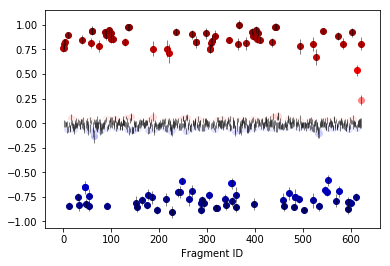

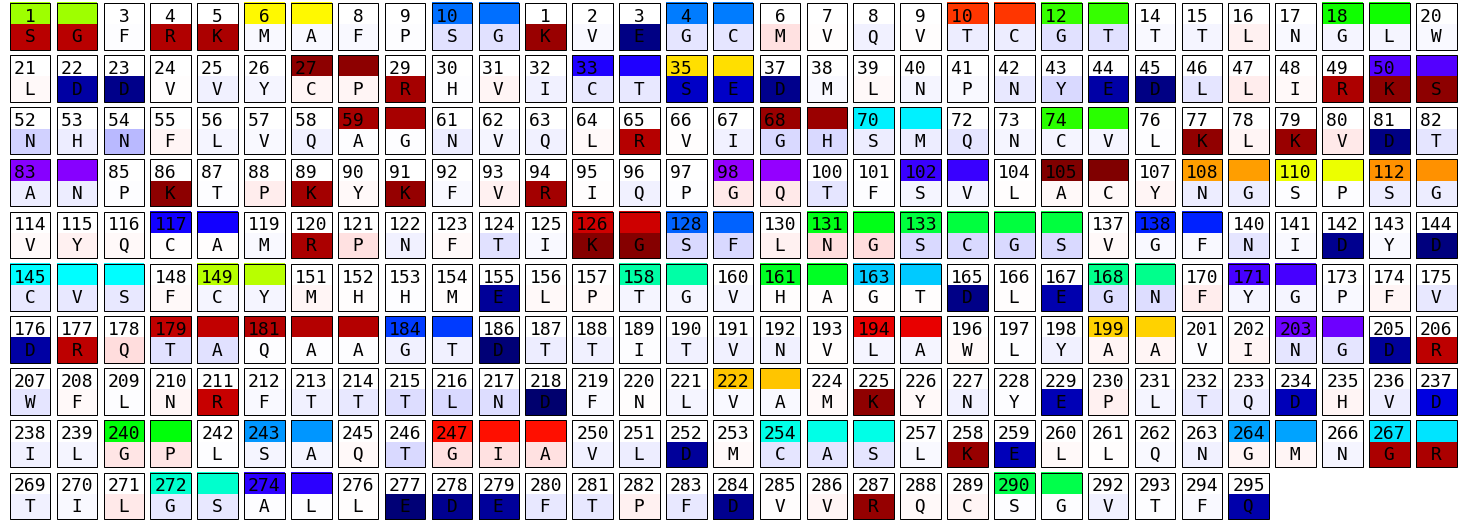

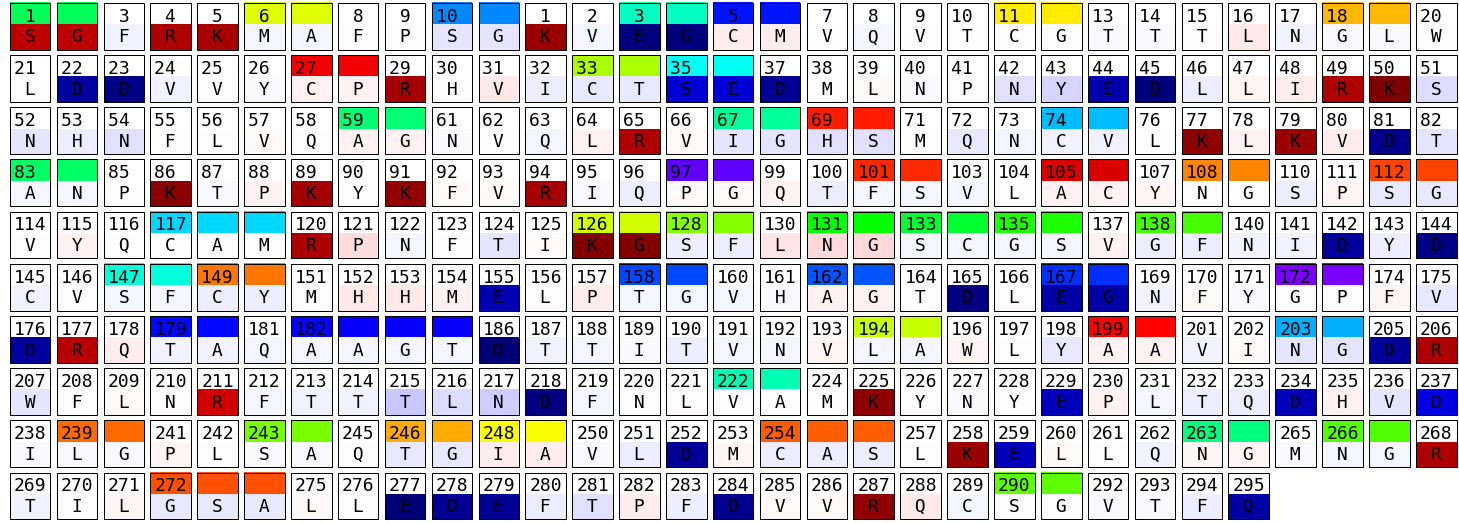

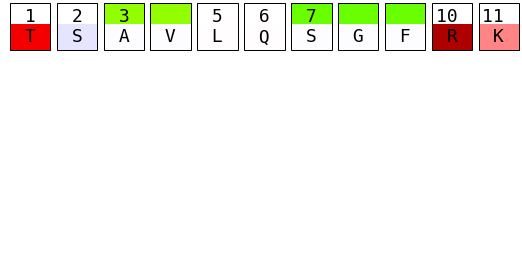

In [80]:
populations['subs01_one'].represent(color_by='charge',view=clean_view(chessboards['subs01_one'][0.05][-1],populations['subs01_one']),with_fragment_labels=True)

In [154]:
def residue_relabelling(feature_labels):
    relabel = []
    for label in feature_labels:
        ch,namepos = label.split('-')
        name,pos = namepos.split(':')
        relabel.append(','.join([name,ch,pos]))
    return relabel
def residue_reindexing(sys):
    sec=Sections(sys)
    return sec.assembly+sec.solvent
def residue_names(sys):
    return residue_relabelling(sys.populations['charge'].feature_labels)
def reform_dataframe(pop,sys):
    import pandas as pd
    labels = residue_names(sys)
    reindex = residue_relabelling(residue_reindexing(sys))
    df=pop.to_dataframe(feature_labels=labels)
    dft = df.describe()
    dft = dft.transpose()
    df_avg= pd.DataFrame([pop.mean,pop.std], columns=labels, index=['mean','std']).transpose()
    #for key in ['min','max']:
    #    df_avg[key]=pd.Series(dft[key].to_list())
    full_df = df_avg.reindex(index=reindex)
    return full_df
def dataframe_sheet(popname,populations,grouptypes):
    from pandas import MultiIndex, DataFrame, concat
    alldf=[]
    for gr in grouptypes:
        sys=populations[gr]
        pop = sys.populations.get(popname)
        if pop is None: continue
        df = reform_dataframe(pop,sys)
        dft=df.transpose()
        mind = MultiIndex.from_tuples([(gr,key) for key in dft.index])
        dft= DataFrame.from_dict(dft.to_dict())
        dft.index = mind
        alldf.append(dft)
    return concat(alldf,sort=True).transpose()
def write_all_sheets(to_extract,populations,grouptypes):
    import pandas as pd
    with pd.ExcelWriter('all_data-new.xlsx',engine='xlsxwriter') as writer:
        for popname in ['charge'] + to_extract.keys():
            if isinstance(popname,float): continue
            df = dataframe_sheet(popname,populations,grouptypes)
            df.to_excel(writer,sheet_name=popname)

In [155]:
write_all_sheets(to_extract,populations,grouptypes)

/home/genovese/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [96]:
def remove_nan(df,transpose=False):
    df1 = df.dropna(how='all')
    dft = df1.transpose()
    df1 = dft.dropna(how='all')
    if transpose:
        return df1
    else:
        return df1.transpose()

def symmetrize_df(df1):
    import numpy as np
    from pandas import DataFrame
    A = df1.values
    W = np.tril(A) + np.triu(A.T, 1)
    return DataFrame(W,columns=df1.columns,index=df1.index)

def reorder(dft,transpose=False):
    from BigDFT.IO import reorder_fragments
    dft1 = dft.reindex(index=reorder_fragments(dft.index))
    df1 = dft1.transpose()
    dft1 = df1.reindex(index=reorder_fragments(df1.index))
    if transpose:
        return dft1
    else:
        return dft1.transpose()

def clean_dataframe(df, symmetrize=True):
    """
    Symmetrize a dataframe and remove the NaN rows and columns
    
    Args:
       df (Dataframe)
       symmetrize (bool): symmetrize the dataframe if applicable
    Returns:
       Dataframe: the cleaned dataframe
    """
    dft = remove_nan(df,transpose=True)
    if symmetrize: dft = symmetrize_df(dft)
    return reorder(dft,transpose=True)


In [107]:
import pandas as pd
with pd.ExcelWriter('all_interactions-with-el.xlsx',engine='xlsxwriter') as writer:
    for gr in grouptypes:
        for kind in ['interactions','el_inhibitors']:
            if kind not in populations[gr].populations: continue
            pop = populations[gr].populations[kind]
            df = clean_dataframe(pop.mean,symmetrize= kind=='interactions')
            df.to_excel(writer,sheet_name=gr+'-'+kind[:3]+'-mean')
            df = clean_dataframe(pop.std,symmetrize= kind=='interactions')
            df.to_excel(writer,sheet_name=gr+'-'+kind[:3]+'-std')

# Represent some interaction maps
We represent a heat map showing the mean ineraction pattern of each of the system with the inhibitor

In [81]:
def nonzero_part(data,cutoff,keys):
    nonzero = set()
    for key in keys:
        dat = data[key]
        for f in dat:
            if abs(dat[f]) > cutoff:
                nonzero.add(f)
    return nonzero

In [82]:
def select_from_view(view,targets):
    reselect = []
    for frag in targets:
        for key,val in view.items():
            if frag in val and key not in reselect:
                reselect.append(key)
                break
    return reselect

In [102]:
from BigDFT import PostProcessing as PP
reload(PP)
from BigDFT.PostProcessing import systems_heatmap, superunits_quadratic_quantities
from BigDFT.IO import reorder_fragments
for gr in grouptypes:
    if 'subs' not in gr:
        continue
    pop = populations[gr].populations['interactions']
    elpop = populations[gr].populations['el_inhibitors']
    df = clean_dataframe(pop.mean)
    el_df = clean_dataframe(elpop.mean,symmetrize=False)
    data = df.to_dict()
    el_data = el_df.to_dict()
    # for key in data:
    #    data[key][key]=0
    if True:
        view = clean_view(chessboards[gr][0.045][-1],data)
        el_view = clean_view(view,el_data)
        el_view = clean_view(el_view, el_df.transpose().to_dict())
        redata = superunits_quadratic_quantities(data,view)
        reel_data = superunits_quadratic_quantities(el_data,el_view)
    sec = Sections(populations[gr])
    if len(sec.inhibitors) ==0: continue
    print ("Interaction Maps for :"+gr)
    restrict_to = reorder_fragments(sec.inhibitors)
    columns = nonzero_part(data,1.e-3,restrict_to)
    cols = [c for c in list(columns) if c not in restrict_to]
    recols = reorder_fragments(cols)
    systems_heatmap(redata,restrict_to=[select_from_view(view,restrict_to)],
                    columns=select_from_view(view,recols))#,vmin=-0.035)
    systems_heatmap(reel_data,restrict_to=[select_from_view(view,restrict_to)],
                    columns=select_from_view(view,recols))#,vmin=-0.035)

KeyError: 'B-GLN:6'

In [99]:
el_data['A-SER:10']

{'B-ALA:3': 7.492870929237885e-06,
 'B-ARG:10': -0.0014797059812174918,
 'B-GLN:6': 0.00016105730032703474,
 'B-GLY:8': -5.1949946199297536e-05,
 'B-LEU:5': -5.708647454231515e-05,
 'B-LYS:11': -0.0002651947901817644,
 'B-PHE:9': 3.0920715443094825e-05,
 'B-SER:2': 5.048502529397276e-05,
 'B-SER:7': -3.0887955178434236e-05,
 'B-THR:1': -0.0006550626360384485,
 'B-VAL:4': 6.274896446509754e-05}

In [172]:
for grp,pp in populations.items():
    print (grp,len(pp.populations['charge'].datas))

('non', 10)
('monomer_apo', 10)
('monomer_subs01', 10)
('apo', 8)
('S-', 10)
('subs01_two', 17)
('R-', 10)
('subs01_one', 19)


In [94]:
grouptypes

['apo',
 'non',
 'R-',
 'S-',
 'monomer_subs01',
 'monomer_apo',
 'subs01_one',
 'subs01_two']

In [122]:
def stacked_dataframe(pop):
    """
    Construct a stacked dataframe with all the data of the population
    
    Warning:
        Weights are ignored, therefore the average value of such stacked dataframe may be different from the population mean.
    """
    from pandas import DataFrame as DF
    df = DF()
    for dd,name in zip(pop.datas,pop.sample_labels):
        df[name]=dd.stack()
    return df.T


In [129]:
def dataframe_interactions(population,target_residues,substrate=None):
    from BigDFT.IO import reorder_fragments
    if substrate is None:
        sec = Sections(population)
        substrate = sec.inhibitors
    restrict_to = reorder_fragments(substrate)
    df = stacked_dataframe(population.populations['interactions'])
    lookup = [(x,res) for x in restrict_to for res in target_residues]
    return df[lookup]

In [137]:
grouptypes

['apo',
 'non',
 'R-',
 'S-',
 'monomer_subs01',
 'monomer_apo',
 'subs01_one',
 'subs01_two']

In [170]:
dfint2 = dataframe_interactions(populations['subs01_two'],['A-HIS:41','A-MET:49','A-HIS:163','A-HIS:164','A-ASP:187','A-ARG:188','A-GLN:189'],
                                substrate=['C-LEU:5'])

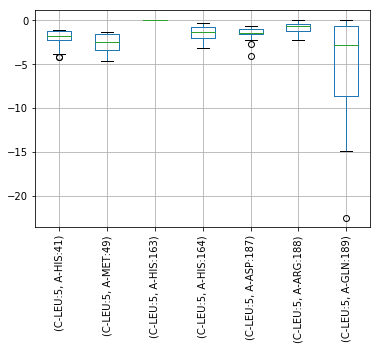

In [171]:
(units.Hartree/(units.kcal/units.mol)*dfint2).boxplot(rot=90)

In [138]:
dfint = dataframe_interactions( populations['monomer_subs01'],['A-GLU:47'])

In [ ]:
sdf = stacked_dataframe()

In [149]:
dfint*units.Hartree/(units.kcal/units.mol)

B-THR:1       B-SER:2       B-ALA:3       B-VAL:4       B-LEU:5  \
       A-GLU:47      A-GLU:47      A-GLU:47      A-GLU:47      A-GLU:47   
0  4.975675e-21  8.534860e-12  1.101241e-10  1.450368e-08  7.180143e-06   
1  0.000000e+00 -3.261400e-14 -6.815176e-12  8.688404e-10  1.810861e-07   
2  2.071070e-17  4.939730e-11  2.804176e-11  4.775568e-08  9.007672e-07   
3  0.000000e+00 -4.414234e-13 -2.743351e-13 -1.633286e-12 -4.391051e-08   
4  0.000000e+00  9.772077e-14 -3.416880e-13  2.542100e-09  1.691826e-06   
5  0.000000e+00 -3.538699e-13 -1.583635e-11  5.742563e-11  7.368751e-08   
6 -3.928636e-20 -5.198292e-11  8.802812e-10  1.249814e-09  1.239811e-06   
7  5.491460e-20  2.322892e-12  1.258320e-09 -2.793689e-08  1.703620e-06   
8  0.000000e+00 -3.148264e-12 -2.822081e-10 -6.667255e-10  1.374669e-07   
9  0.000000e+00 -1.724136e-11 -6.291933e-10  1.230374e-09  1.536607e-06   

        B-GLN:6       B-SER:7       B-GLY:8       B-PHE:9      B-ARG:10  \
       A-GLU:47      A-GLU:47      A-GLU:47      A-GLU:47      A-GLU:47   
0 -2.751454e-11 -1.833203e-07 -2.813565e-09  1.012927e-07 -8.878176e-12   
1 -4.002245e-13  6.390862e-08  1.043101e-07 -2.526532e-03  4.475366e-09   
2 -2.787273e-13 -3.522014e-10  1.012600e-10 -1.769094e-09  1.405403e-12   
3  1.510376e-14  5.068993e-09  3.338923e-09 -3.389399e-04  2.287013e-07   
4 -1.001799e-11  9.714060e-10  4.050046e-10  1.568703e-07  4.301430e-12   
5  6.020803e-14  3.359341e-10 -5.964488e-10 -2.569871e-08 -2.878675e-10   
6 -3.212240e-12 -2.485516e-09 -6.265175e-10  9.810605e-09 -7.099735e-12   
7 -4.981248e-13 -5.745820e-10  4.664151e-09 -1.124899e-05  7.469392e-09   
8 -8.584946e-17  3.213894e-09  1.558412e-09 -1.784651e-04 -5.991675e+01   
9  7.132999e-13 -9.569884e-09 -3.602003e-10  9.225537e-05  6.119737e-11   

       B-LYS:11  
       A-GLU:47  
0  1.979836e-18  
1 -6.859536e-13  
2 -1.679661e-19  
3 -4.984202e-02  
4  2.264238e-16  
5  1.061881e-13  
6  1.515153e-15  
7 -2.949937e-12  
8 -2.926433e-03  
9 -5.220309e-20

In [143]:
from ase import units

In [145]:
units.Hartree/(units.kcal/units.mol)

627.5094738898777

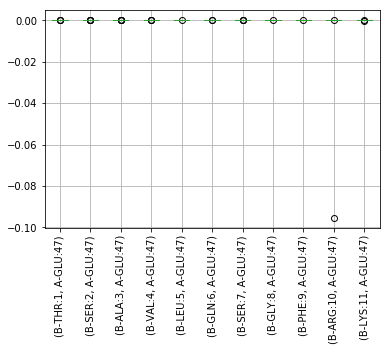

In [139]:
dfint.boxplot(rot=90)

$$ \psi(r) = \sum_\alpha C_\alpha \phi_\alpha(r)$$

$$ \hat \rho =\equiv \sum_{\psi} \psi(r) \psi(r') =  \sum_{\alpha\beta}  \underbrace{\sum_\psi C^\psi_\alpha C^\psi_\beta}_{K_{\alpha\beta}}  \phi_\alpha(r) \phi_\beta(r') $$

$$ \int \phi_\alpha(r) \phi_\beta(r) \equiv S_{\alpha\beta} $$

In [130]:
gr

'subs01_two'

In [123]:
pop = populations['monomer_apo'].populations['interactions']

In [124]:
df = stacked_dataframe(pop)

In [128]:
df[[(x,yval[0]) for x in xval]]

A-GLN:19      A-THR:21
   A-GLN:69      A-GLN:69
0 -0.039498  3.513628e-08
1 -0.045928 -3.916949e-02
2 -0.026305 -7.997927e-08
3 -0.033862 -3.460661e-02
4 -0.064530 -6.064578e-08
5 -0.069499 -2.236803e-08
6 -0.038541  6.914556e-09
7 -0.023579 -7.639964e-08
8 -0.033098  4.748749e-08
9 -0.040427  2.005625e-08

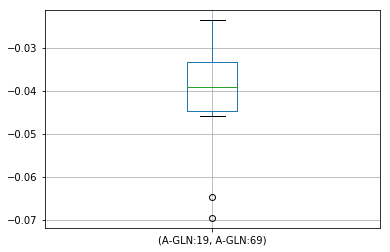

In [119]:
df.loc[[(xval[0],yval[0])]].T.boxplot()

In [18]:
dd=pop.datas[0]

In [20]:
xval=['A-GLN:19','A-THR:21']
yval=['A-GLN:69','A-MET:165']

In [29]:
dd[xval[0]][yval[0]]

-0.041501681602000295

In [115]:
pop.mean.loc[xval[0],yval[0]]

-0.04136511541481042

In [92]:
import pandas as pd
ll = []
for dd,nm in zip(pop.datas,pop.sample_labels):
    redd = dd
    redd['name'] = nm
    ll.append(redd)
newdd= pd.concat(ll,sort=True)

In [97]:
pd.DataFrame(newdd.stack(),columns=['ciao'])

ciao
A-ALA:116 A-ALA:116  -9.760617e+00
          A-ALA:129  -2.191204e-15
          A-ALA:173  -5.007826e-15
          A-ALA:191   0.000000e+00
          A-ALA:193   0.000000e+00
          A-ALA:194   0.000000e+00
          A-ALA:206   0.000000e+00
          A-ALA:210   0.000000e+00
          A-ALA:211   0.000000e+00
          A-ALA:234   0.000000e+00
          A-ALA:255   0.000000e+00
          A-ALA:260   0.000000e+00
          A-ALA:266   0.000000e+00
          A-ALA:285   0.000000e+00
          A-ALA:7    -8.330714e-12
          A-ALA:70   -2.476212e-18
          A-ALA:94    0.000000e+00
          A-ARG:105   0.000000e+00
          A-ARG:131   1.027390e-22
          A-ARG:188   0.000000e+00
          A-ARG:217   0.000000e+00
          A-ARG:222   0.000000e+00
          A-ARG:279   0.000000e+00
          A-ARG:298   0.000000e+00
          A-ARG:4     0.000000e+00
          A-ARG:40    0.000000e+00
          A-ARG:60    0.000000e+00
          A-ARG:76    0.000000e+00
          A-ASN:119   6.094884e-09
          A-ASN:133   0.000000e+00
...                            ...
E-SOL:968 E-SOL:4150  0.000000e+00
          E-SOL:4891  0.000000e+00
          E-SOL:4924 -1.372648e-15
          E-SOL:5113  3.667207e-11
          E-SOL:5386 -2.745346e-13
          E-SOL:5436  0.000000e+00
          E-SOL:5504  0.000000e+00
          E-SOL:5534 -4.286781e-02
          E-SOL:5550  0.000000e+00
          E-SOL:5650 -1.942291e-10
          E-SOL:5826  2.413903e-10
          E-SOL:6052  0.000000e+00
          E-SOL:6512 -9.126342e-06
          E-SOL:6619  4.271775e-09
          E-SOL:6678  0.000000e+00
          E-SOL:6812 -5.716751e-12
          E-SOL:6933 -2.944086e-09
          E-SOL:712   8.536676e-15
          E-SOL:7578  1.176442e-12
          E-SOL:7624  0.000000e+00
          E-SOL:7740  0.000000e+00
          E-SOL:7824  0.000000e+00
          E-SOL:8429  0.000000e+00
          E-SOL:8442  4.497538e-12
          E-SOL:8860  0.000000e+00
          E-SOL:9080 -3.422251e-11
          E-SOL:9351  0.000000e+00
          E-SOL:9542  0.000000e+00
          E-SOL:968  -3.514110e+00
          name        1.600000e+01

[8074114 rows x 1 columns]

In [64]:
redd = newdd.loc[xval,yval]

In [74]:
dd.melt(id_vars=xval,value_vars=yval)

A-GLN:19      A-THR:21   variable         value
0     1.740576e-12  0.000000e+00   A-GLN:69 -1.334473e-16
1     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
2     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
3     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
4     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
5     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
6     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
7     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
8     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
9     0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
10    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
11    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
12    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
13    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
14    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
15   -5.113960e-05  4.228799e-11   A-GLN:69 -5.650205e-01
16   -2.332350e-14  0.000000e+00   A-GLN:69 -7.376651e-15
17    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
18    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
19    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
20    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
21    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
22    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
23    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
24    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
25   -2.074986e-14 -8.106449e-13   A-GLN:69 -3.476693e-19
26    0.000000e+00  1.746112e-15   A-GLN:69  0.000000e+00
27   -2.176293e-10 -3.675285e-14   A-GLN:69 -7.696252e-08
28   -1.089411e-02  1.370839e-07   A-GLN:69 -8.491252e-06
29    0.000000e+00  0.000000e+00   A-GLN:69  0.000000e+00
...            ...           ...        ...           ...
1352  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1353 -9.224769e-24  0.000000e+00  A-MET:165  2.030473e-10
1354  0.000000e+00  0.000000e+00  A-MET:165 -4.451147e-11
1355  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1356  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1357  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1358  0.000000e+00  0.000000e+00  A-MET:165 -2.554766e-11
1359 -1.287949e-13 -1.809968e-10  A-MET:165 -1.630025e-13
1360  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1361 -1.562894e-13 -7.689659e-18  A-MET:165 -3.803591e-16
1362  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1363  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1364  1.681962e-10 -7.694214e-12  A-MET:165  0.000000e+00
1365  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1366  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1367 -5.279545e-20  0.000000e+00  A-MET:165  9.750354e-14
1368  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1369  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1370  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1371  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1372  3.557497e-18 -1.016701e-15  A-MET:165 -9.568551e-10
1373  3.661497e-17  0.000000e+00  A-MET:165 -5.670834e-16
1374  5.160768e-19  1.729249e-17  A-MET:165  1.763789e-12
1375 -2.513747e-12 -7.318373e-09  A-MET:165  1.322275e-16
1376  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1377  2.389441e-11 -7.600120e-14  A-MET:165 -8.448244e-21
1378  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00
1379  5.628138e-19  1.080296e-14  A-MET:165  4.558853e-13
1380 -1.389536e-15 -2.135862e-13  A-MET:165  8.051017e-17
1381  0.000000e+00  0.000000e+00  A-MET:165  0.000000e+00

[1382 rows x 4 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a49f2da10>,
      dtype=object)

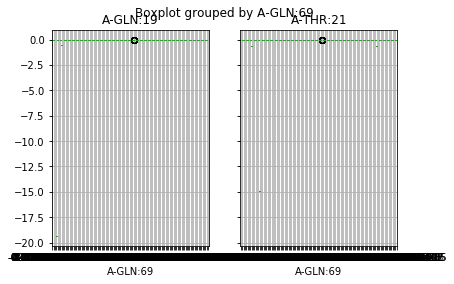

In [62]:
dd.boxplot(column=xval,by=yval[0])

In [55]:
import seaborn as sns

In [59]:
sns.violinplot(data=newdd,x='name',y=[yval[0]])

ValueError: Wrong number of items passed 1, placement implies 11707

In [54]:
newdd.groupby('name').loc[xval,yval]

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [379]:
tt = BioQM.BioSystem('new_clusters/subs05_one_sub/subs05_one_sub_cluster_1.pdb')

In [387]:

populations['subs01_one'].populations['charge'].datas[2].sum()

nan

In [381]:
sum(len(f) for f in tt.values())

9766

# Represent some data
We represent, as an example of all the data, the charge on the R covalent system, and on the apo-protein.
Also, we represent the interaction of the dimer with the inhibitor in the S covalent and in the noncovalent

## Charges on the apo-protein residues

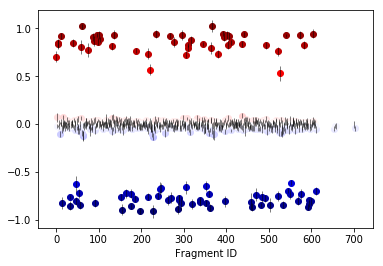

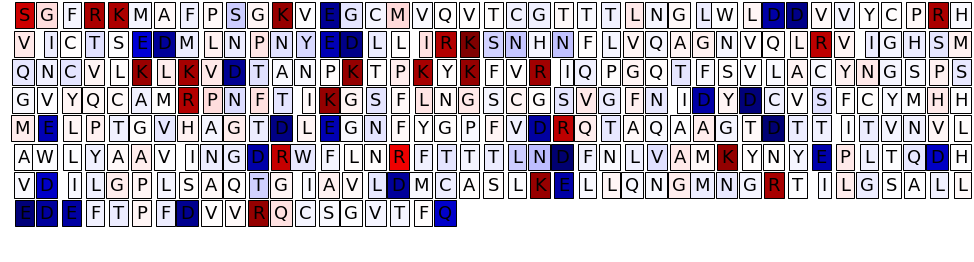

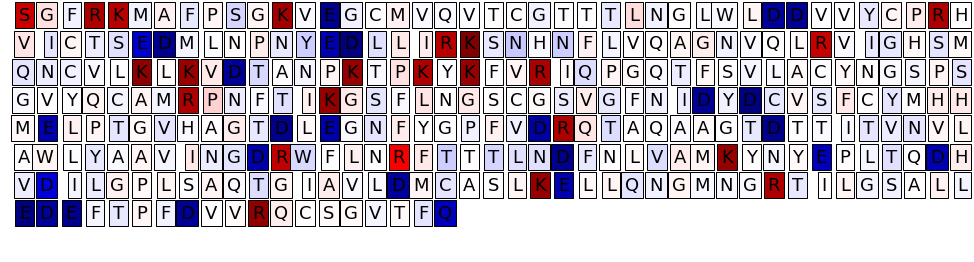

In [14]:
biopop['apo'].represent(color_by='charge')

## Charges on the Rcov population

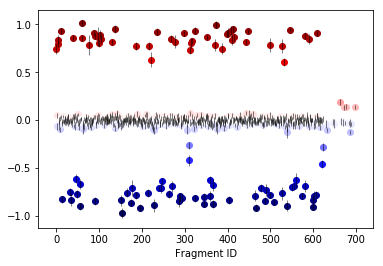

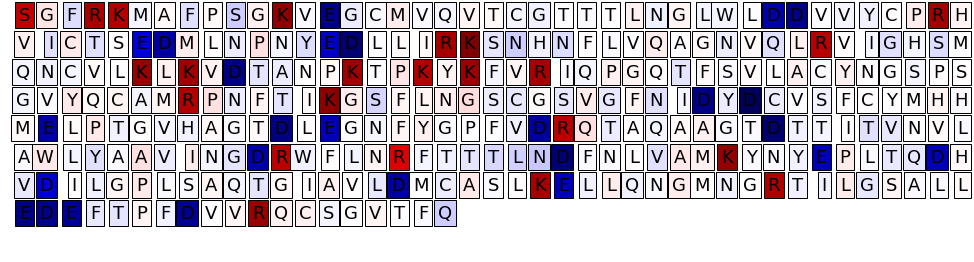

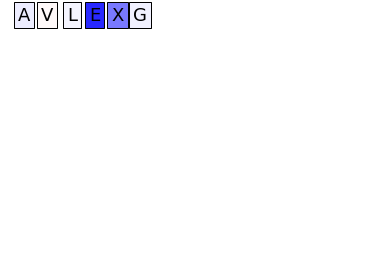

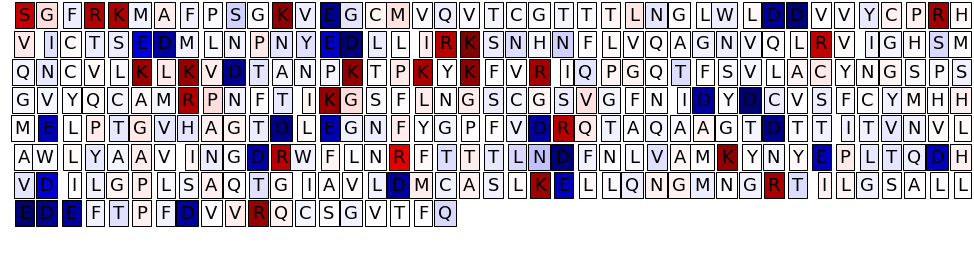

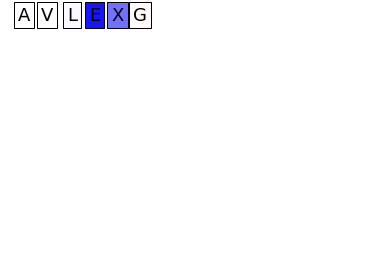

In [15]:
biopop['R'].represent(color_by='charge')

## Interactions with the inhibitor in the noncovalent case

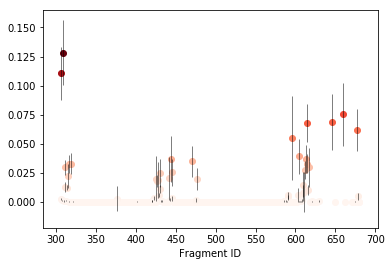

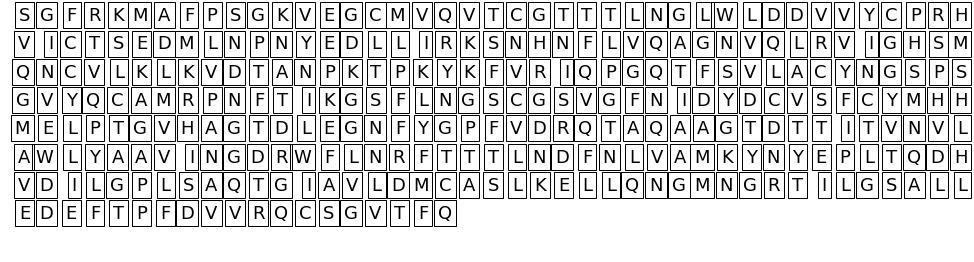

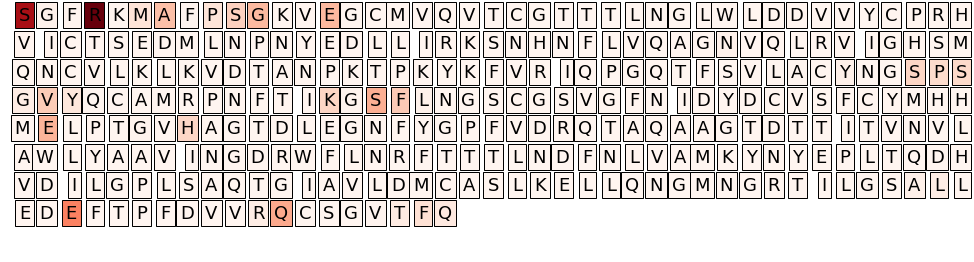

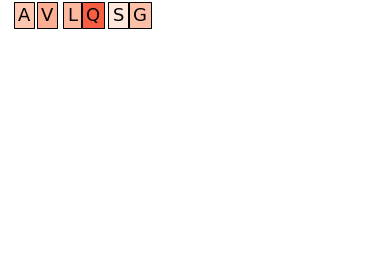

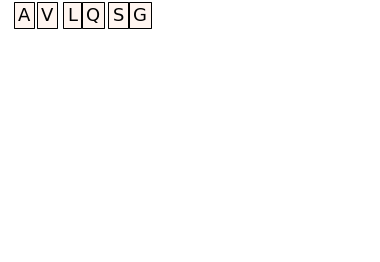

In [18]:
biopop['non'].represent(color_by='monomer1')

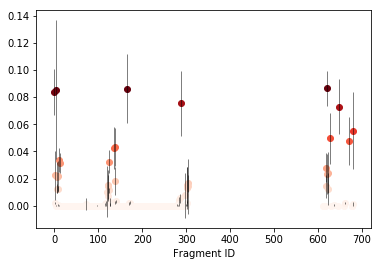

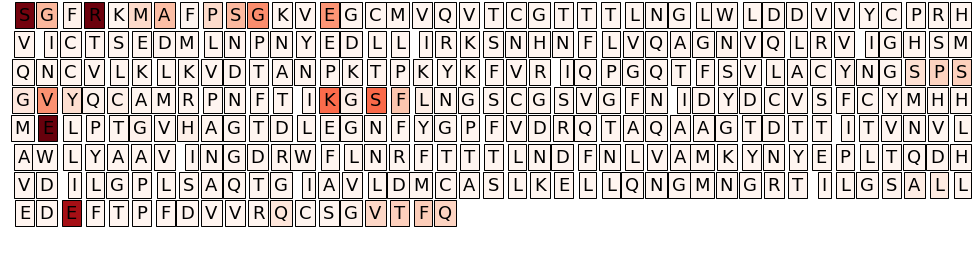

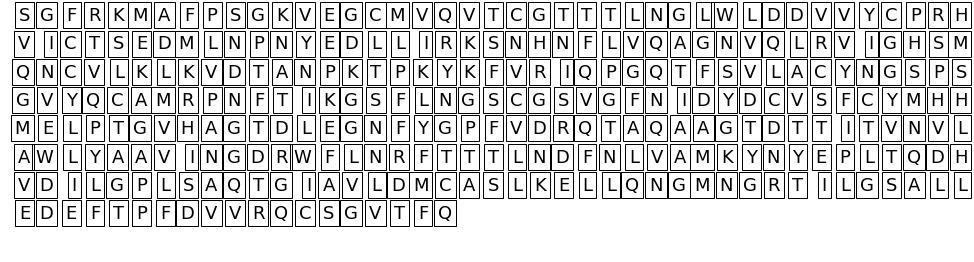

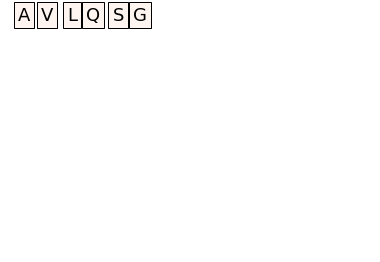

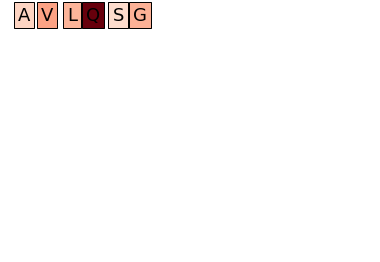

In [19]:
biopop['non'].represent(color_by='monomer2')

## Interactions with the inhibitors in the Scov population

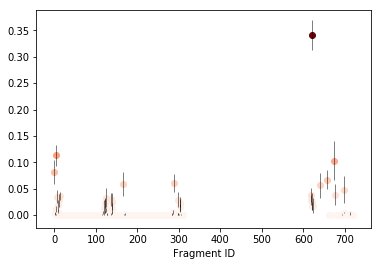

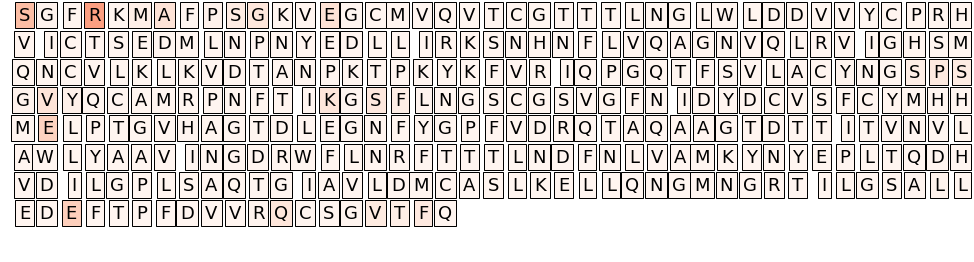

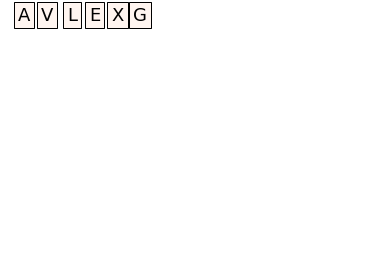

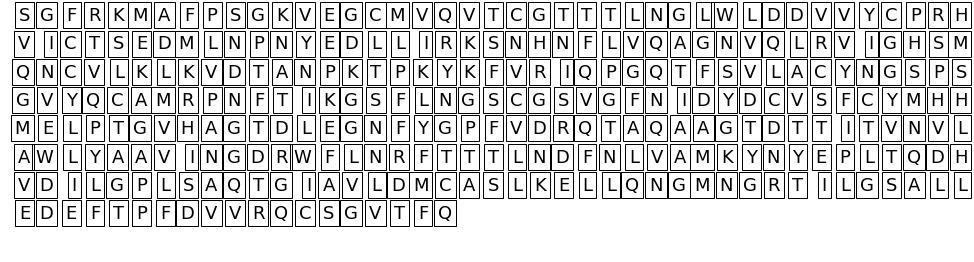

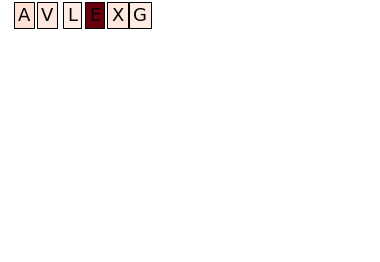

In [22]:
biopop['S'].represent(color_by='monomer2')

We may continue by plotting other data of course.

# Print out the data in csv format
For any population, we can print the data in a file.

In [96]:
def population_to_csv(pop,filename,feature_labels):
    import pandas as pd
    relabel = []
    for label in feature_labels:
        ch,namepos = label.split('-')
        name,pos = namepos.split(':')
        relabel.append(','.join([name,ch,pos]))
    df= pd.DataFrame([pop.mean,pop.std], columns=relabel)
    df.transpose().to_csv(filename,header=False)

In [97]:
label_names = {tp:'interactions-with-'+tp for tp in ['solvent','inhibitors','monomer1','monomer2','dimer']}
label_names['charge'] = 'charges-on-residues'
def dump_all_desired_csv(biopop,label_names):
    for group,representative in biopop.items():
        feature_labels = representative.populations['charge'].feature_labels
        for label,pop in representative.populations.items():
            if label not in label_names:
                continue
            relabel = label_names[label]
            filename = '_'.join((str(group),str(relabel)))+'.csv'
            population_to_csv(pop,filename,feature_labels)

In [88]:
dump_all_desired_csv(biopop,label_names)

In [ ]:
def diff_with_apo(apo,pop_apo,rep,pop,switch_chains=None):
    apo_to_rep = reorder(pop_apo.mean,of=apo,with_respect_to=rep,switch_chains=switch_chains)
    diff = pop.mean - apo_to_rep
    apo_to_rep_err = reorder(pop_apo.std,of=apo,with_respect_to=rep,switch_chains=switch_chains)
    diff_err = 1.4*(pop.std + apo_to_rep_err)
    return diff,diff_err